
Topic: Challenge Set 1 Subject: Explore MTA turnstile data Date: 09/27/2019 Name: Alison Glazer Worked with: -- Location:

In [115]:
import sys
print("Python Version:", sys.version)

Python Version: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


b) LABEL CHALLENGE NUMBERS in bold.

b) All graphs should have a title. Also, label both x and y axes.

To compare results consistently, where applicable, use: test_size=0.30, random_state=4444. You can always experiment with different test_size and random_state, but for submission purposes, use these given settings.

8. Do not print copious output in your Jupyter notebook.
For dictionaries, print a few key/value pairs. Don't print more than 10-20 lines of data (of data frame or array).


In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from datetime import datetime

### **CHALLENGE 1**

In [57]:
# Create a dict with keys = single turnstile and values are list of lists: [all other columns in the given row]

#Read in a dataset from the MTA website
link = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt'
turnstile_data = pd.read_csv(link)

In [121]:
turnstile_dict = defaultdict(list) #set up dictionary. Keys are tuples of the first 4 columns. Values are all other columns

for ind in range(0,len(turnstile_data)):
    row = turnstile_data.iloc[ind]
    key = tuple(row[0:4])
    val = list(row[4:])
    turnstile_dict[key].append(list(val))        

In [117]:
turnstile_dict

In [162]:
len(turnstile_dict)

4873

### **CHALLENGE 2**

In [145]:
# Create a dict with keys = single turnstile and values are list of lists: [date_time, entries]

#Set up new dictionary. Keys same as #1. Values = [datetime,entries]
new_turnstile_dict = defaultdict(list)


# Create date/time column 
turnstile_data['date_time'] = (turnstile_data['DATE'] + ' ' + turnstile_data['TIME']).apply(lambda x: datetime.strptime(x,'%m/%d/%Y %H:%M:%S'))

#Iterate through DF rows
for ind in range(0,len(turnstile_data)):
    row = turnstile_data.iloc[ind]
    key = tuple(row[0:4]) #same setup as #1 for key, index of first 4 columns
    val = [row[-1],row[-3]] # first element is datetime object, second element is entries
    new_turnstile_dict[key].append(list(val))        


In [ ]:
new_turnstile_dict

In [161]:
len(new_turnstile_dict)

4873

### **CHALLENGE 3**

Ans: n is 4, the counts are taken every 4 hours

In [173]:
# Create a dict with keys = single turnstile and values are list of lists: [single day, total entries for that day]

# Set up a column for entry counts at each turnstile
turnstile_data['entry_counts'] = abs(turnstile_data.groupby(['C/A','UNIT','SCP','STATION']).ENTRIES.diff())

In [177]:
# Calculate entries per day per turnstile
daily_entries = turnstile_data.set_index('date_time').groupby(['C/A','UNIT','SCP','STATION']).resample('d')['entry_counts'].sum().reset_index()


In [179]:
# Set up a new dictionary. Keys are the same as #1 & #2
# Values are: single value for a single day == total passengers that entered

new_turnstile_dict_2 = defaultdict(list)

#Iterate through daily_entries DF rows
for ind in range(0,len(daily_entries)):
    row = daily_entries.iloc[ind]
    key = tuple(row[0:4]) #same setup as #1 for key, index of first 4 columns
    val = [row[-2],row[-1]] # first element is datetime object, second element is entries
    new_turnstile_dict_2[key].append(list(val))  

In [180]:
new_turnstile_dict_2

defaultdict(list,
            {('A002',
              'R051',
              '02-00-00',
              '59 ST'): [[Timestamp('2019-06-01 00:00:00'),
               712.0], [Timestamp('2019-06-02 00:00:00'), 750.0], [Timestamp('2019-06-03 00:00:00'),
               1382.0], [Timestamp('2019-06-04 00:00:00'),
               1616.0], [Timestamp('2019-06-05 00:00:00'), 1544.0], [Timestamp('2019-06-06 00:00:00'),
               1548.0], [Timestamp('2019-06-07 00:00:00'), 1611.0]],
             ('A002',
              'R051',
              '02-00-01',
              '59 ST'): [[Timestamp('2019-06-01 00:00:00'),
               603.0], [Timestamp('2019-06-02 00:00:00'), 655.0], [Timestamp('2019-06-03 00:00:00'),
               1145.0], [Timestamp('2019-06-04 00:00:00'),
               1281.0], [Timestamp('2019-06-05 00:00:00'), 1303.0], [Timestamp('2019-06-06 00:00:00'),
               1321.0], [Timestamp('2019-06-07 00:00:00'), 1323.0]],
             ('A002',
              'R051',
              

### **CHALLENGE 4**

In [188]:
# Plot the time series by day for a single turnstile

# Pick a turnstile to plot
ts_to_plot = tuple(turnstile_data.loc[0][0:4])

In [190]:
dates,counts = zip(*new_turnstile_dict_2[ts_to_plot])

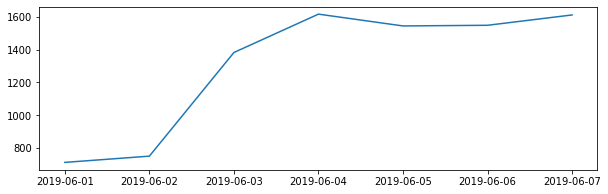

In [196]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts);

### **CHALLENGE 5**

In [222]:
# Create a dictionary
# Keys are each station (C/A,Unit,Station)
# Values are [day, total entries]

# Instantiate dictionary
ca_unit_station_dict = defaultdict(list)

# Calculate daily entries per station
ca_unit_station_daily_entries = turnstile_data.set_index('date_time').groupby(['C/A','UNIT','STATION']).resample('d')['entry_counts'].sum().reset_index()

#Iterate through daily_entries DF rows
for ind in range(0,len(ca_unit_station_daily_entries)):
    row = ca_unit_station_daily_entries.iloc[ind]
    key = tuple(row[0:3]) #key = first 3 elements = c/a,unit,station
    val = [row[-2],row[-1]] # first element is datetime object, second element is entries
    ca_unit_station_dict[key].append(list(val))  


In [223]:
ca_unit_station_dict

defaultdict(list,
            {('A002',
              'R051',
              '59 ST'): [[Timestamp('2019-06-01 00:00:00'),
               6525.0], [Timestamp('2019-06-02 00:00:00'), 6581.0], [Timestamp('2019-06-03 00:00:00'),
               12377.0], [Timestamp('2019-06-04 00:00:00'),
               13472.0], [Timestamp('2019-06-05 00:00:00'), 13541.0], [Timestamp('2019-06-06 00:00:00'),
               13702.0], [Timestamp('2019-06-07 00:00:00'), 13619.0]],
             ('A006',
              'R079',
              '5 AV/59 ST'): [[Timestamp('2019-06-01 00:00:00'),
               6053.0], [Timestamp('2019-06-02 00:00:00'), 5786.0], [Timestamp('2019-06-03 00:00:00'),
               11791.0], [Timestamp('2019-06-04 00:00:00'),
               12955.0], [Timestamp('2019-06-05 00:00:00'), 12538.0], [Timestamp('2019-06-06 00:00:00'),
               12944.0], [Timestamp('2019-06-07 00:00:00'), 11985.0]],
             ('A007',
              'R079',
              '5 AV/59 ST'): [[Timestamp('2019-

### **CHALENGE 6**

In [227]:
# Similar to CHALLENGE 5, but only considering STATION rather than C/A,UNIT,STATION
# Dictionary - keys: station, values = lists of tuples rather than lists of lists (date,count)


# Instantiate dictionary
station_dict = defaultdict(list)

# Calculate daily entries per station
station_daily_entries = turnstile_data.set_index('date_time').groupby('STATION').resample('d')['entry_counts'].sum().reset_index()

#Iterate through daily_entries DF rows
for ind in range(0,len(station_daily_entries)):
    row = station_daily_entries.iloc[ind]
    key = row[0] #key = station
    val = [row[-2],row[-1]] # first element is datetime object, second element is entries
    station_dict[key].append(list(val))  


In [229]:
station_dict

defaultdict(list,
            {'1 AV': [[Timestamp('2019-06-01 00:00:00'), 5417.0],
              [Timestamp('2019-06-02 00:00:00'), 5803.0],
              [Timestamp('2019-06-03 00:00:00'), 17040.0],
              [Timestamp('2019-06-04 00:00:00'), 17433.0],
              [Timestamp('2019-06-05 00:00:00'), 19434.0],
              [Timestamp('2019-06-06 00:00:00'), 18639.0],
              [Timestamp('2019-06-07 00:00:00'), 20257.0]],
             '103 ST': [[Timestamp('2019-06-01 00:00:00'), 10401.0],
              [Timestamp('2019-06-02 00:00:00'), 9582.0],
              [Timestamp('2019-06-03 00:00:00'), 28928.0],
              [Timestamp('2019-06-04 00:00:00'), 29483.0],
              [Timestamp('2019-06-05 00:00:00'), 30690.0],
              [Timestamp('2019-06-06 00:00:00'), 29293.0],
              [Timestamp('2019-06-07 00:00:00'), 30577.0]],
             '103 ST-CORONA': [[Timestamp('2019-06-01 00:00:00'), 12692.0],
              [Timestamp('2019-06-02 00:00:00'), 10683.0],
    

### **CHALLENGE 7**

Plot the time series for a station.


In [234]:
# Pick a turnstile to plot
station_to_plot = turnstile_data['STATION'][0]

dates,counts = zip(*station_dict[station_to_plot])


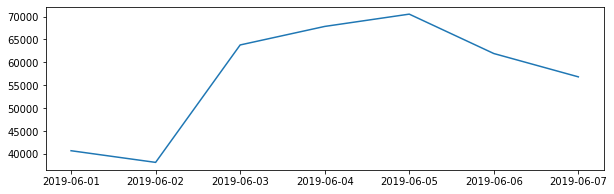

In [235]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts);

### **CHALLENGE 8**

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

In [252]:
# Create lists of 7 elements, each element is a daily count for a station
# Plot the daily counts for 4 weeks (going to do 4 stations instead)

In [249]:
# Instantiate dictionary, keys will be stations, values will be list of lists (detailed above)
station_counts = defaultdict(list)

#Iterate through daily_entries DF rows
for ind in range(0,len(station_daily_entries)):
    row = station_daily_entries.iloc[ind]
    key = row[0] #key = station
    val = row.entry_counts # entries
    station_counts[key].append(val)  


In [250]:
# Select the 4 stations' week counts
station_counts_to_plot = list(station_counts.values())[0:5]

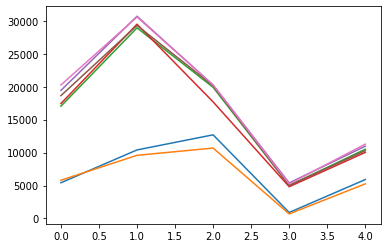

In [254]:
# Plot
plt.plot(station_counts_to_plot);

### **CHALLENGE 9**

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [255]:
import pickle
# Loading in the data file created for project 1 that has 12 weeks represented
with open('challenges_data/clean_df.pickle','rb') as read_file:
    clean_df = pickle.load(read_file)

In [260]:
total_ridership = clean_df.groupby('station').total_traffic.sum().sort_values(ascending=False)

In [261]:
total_ridership

station
34 ST-PENN STA     16439860.0
23 ST              12165809.0
GRD CNTRL-42 ST    10714137.0
FULTON ST          10582561.0
34 ST-HERALD SQ    10286919.0
                      ...    
BEACH 98 ST           64107.0
TOMPKINSVILLE         57235.0
BROAD CHANNEL         34535.0
BEACH 105 ST          34085.0
ORCHARD BEACH           392.0
Name: total_traffic, Length: 379, dtype: float64

### **CHALLENGE 10**

In [267]:
# Make a list of the total ridership counts
total_ridership_counts = list(total_ridership)

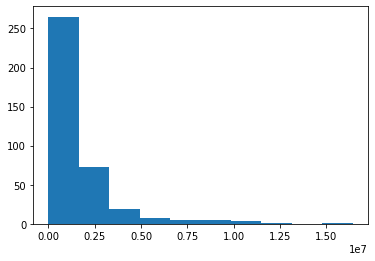

In [270]:
# Plot it on a histogram
plt.hist(total_ridership_counts);

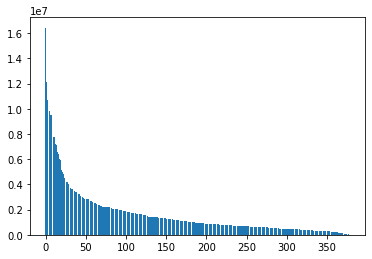

In [273]:
# Plot on a bar chart
indices = range(len(total_ridership_counts))
plt.bar(indices, total_ridership_counts);